In [102]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from skimage.filters import threshold_otsu
from skimage.morphology import label, closing, square
from skimage.color import label2rgb

In [103]:
# Importing image as 8-bit greyscale values
path = '../shape-relation-measures/1carr-96etoh-alexa-sted-decon.tif'
img = Image.open(path).convert('L')
image = np.array(img)

In [104]:
# Thresholding + closure
# threshold_value = threshold_otsu(image)
# bw = closing(image > threshold_value, square(3))

# Thresholding
threshold_value = 70
bw = image > threshold_value

In [105]:
# Labelling
label_image = label(bw, connectivity=2)

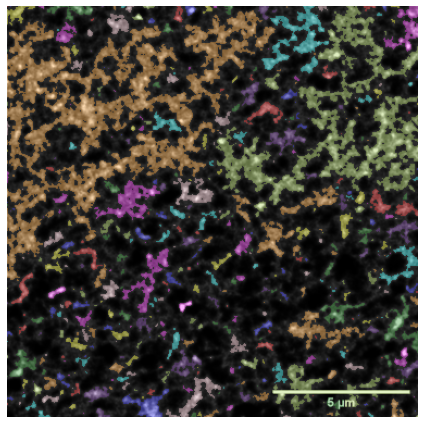

In [106]:
# Converting labels to rgb
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

ax.set_axis_off()
plt.tight_layout()
plt.show()